### Question 1: Is there a correlation between good performance in one module and another?
(20 Marks)
Hint: Perform suitable technique to deal with missing values. There are multiple ways to deal with missing values, provide reasonable explanation for the technique used. Pick a group of students and determine if there is a correlation between the results of two modules of your choice. How did the correlation compare across students from different academic programs?

Firstly, we will import the basic packages required then open the file using pandas to observe the data.
The data is noted to have 335 rows.

In [1]:
#import packages
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('student-grades_1021.csv')
data

,Student ID,Program ID,CLASS,Chem.CA,Chem.TEST1,Chem.TEST2,Chem.TEST3,Chem.SemMark,Chem.SemGrade,Physics.CA1,...,English.ASG2,English.CA1,English.CA2,English.SemMark,English.SemGrade,Geo.CA1,Geo.CA2,Geo.ASG1,Geo.SemMark,Geo.Sem Grade
0,198,Prog_B,A,85,68,100,90,86,A+,80.9,...,78.0,79.0,70.0,77.0,B+,100.0,75.0,71.5,81.0,A
1,199,Prog_B,A,90,95,100,88,93,A+,84.8,...,80.0,86.0,85.0,84.0,A,85.0,65.0,55.0,67.0,C+
2,200,Prog_B,A,79,53,29,75,63,C,80.9,...,80.5,78.0,60.0,79.0,B+,95.0,43.3,58.5,65.0,C+
3,201,Prog_B,A,85,100,93,58,84,A,85.0,...,74.0,88.0,85.0,78.0,B+,83.3,66.7,68.5,72.0,B
4,202,Prog_B,A,90,93,93,68,87,A+,85.9,...,84.4,95.0,85.0,88.0,AD,98.3,85.0,96.0,93.0,A+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,145,Prog_D,N,96,100,100,80,94,A+,77.5,...,74.5,95.0,85.0,81.0,A,100.0,70.0,77.5,82.0,A
331,146,Prog_D,N,82,83,95,95,87,A+,78.9,...,77.0,95.0,90.0,83.0,A,100.0,86.7,85.0,90.0,A+
332,147,Prog_D,N,85,68,70,55,73,B,78.9,...,79.5,84.0,80.0,81.0,A,90.0,61.7,57.0,68.0,C+
333,148,Prog_D,N,88,95,100,78,90,A+,78.0,...,80.5,98.0,85.0,83.0,A,90.0,58.3,60.0,68.0,C+


In [3]:
data.isnull().sum()

Student ID          0
Program ID          0
CLASS               0
Chem.CA             0
Chem.TEST1          0
Chem.TEST2          0
Chem.TEST3          0
Chem.SemMark        0
Chem.SemGrade       0
Physics.CA1         2
Physics.CA2         2
Physics.ASG1        2
Physics.SemMark     2
Physics.SemGrade    2
English.ASG1        3
English.ASG2        3
English.CA1         3
English.CA2         3
English.SemMark     3
English.SemGrade    3
Geo.CA1             3
Geo.CA2             3
Geo.ASG1            3
Geo.SemMark         3
Geo.Sem Grade       3
dtype: int64

In [4]:
# see rows with null values
nulldata = data.isnull()
nulldata = nulldata.any(axis=1)
rows_with_null = data[nulldata]

rows_with_null

,Student ID,Program ID,CLASS,Chem.CA,Chem.TEST1,Chem.TEST2,Chem.TEST3,Chem.SemMark,Chem.SemGrade,Physics.CA1,...,English.ASG2,English.CA1,English.CA2,English.SemMark,English.SemGrade,Geo.CA1,Geo.CA2,Geo.ASG1,Geo.SemMark,Geo.Sem Grade
12,210,Prog_B,A,98,100,100,95,98,AD,87.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,212,Prog_B,A,80,40,35,38,55,D+,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,265,Prog_C,J,68,73,35,23,53,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The number of null values seem to be similar , hence it may be due to missing values per row rather than column. 

By filtering out the rows with NA values, those with #N/A values come from only 3 rows.Hence it would make more sense to delete the rows rather than to fill the columns. 3 out of 335 rows is less than 1 percent of the values hence it would not affect our analysis much.

In the next step we will drop the rows with NA values and do a check again to see if the null values are removed. Then we will check how many rows are removed from the dropna function.

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Student ID          0
Program ID          0
CLASS               0
Chem.CA             0
Chem.TEST1          0
Chem.TEST2          0
Chem.TEST3          0
Chem.SemMark        0
Chem.SemGrade       0
Physics.CA1         0
Physics.CA2         0
Physics.ASG1        0
Physics.SemMark     0
Physics.SemGrade    0
English.ASG1        0
English.ASG2        0
English.CA1         0
English.CA2         0
English.SemMark     0
English.SemGrade    0
Geo.CA1             0
Geo.CA2             0
Geo.ASG1            0
Geo.SemMark         0
Geo.Sem Grade       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 334
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        332 non-null    int64  
 1   Program ID        332 non-null    object 
 2   CLASS             332 non-null    object 
 3   Chem.CA           332 non-null    int64  
 4   Chem.TEST1        332 non-null    int64  
 5   Chem.TEST2        332 non-null    int64  
 6   Chem.TEST3        332 non-null    int64  
 7   Chem.SemMark      332 non-null    int64  
 8   Chem.SemGrade     332 non-null    object 
 9   Physics.CA1       332 non-null    float64
 10  Physics.CA2       332 non-null    float64
 11  Physics.ASG1      332 non-null    float64
 12  Physics.SemMark   332 non-null    float64
 13  Physics.SemGrade  332 non-null    object 
 14  English.ASG1      332 non-null    float64
 15  English.ASG2      332 non-null    float64
 16  English.CA1       332 non-null    float64
 1

From the information above, 3 rows have been removed out of the 335 rows, therefore there are no more null values.

Next we will move on to the second part of the question- Pick a group of students and determine if there is a correlation between the results of two modules of your choice. How did the correlation compare across students from different academic programs?

We will pick Program B students and determine if there is a correlation between the results of chem sem marks and physics sem marks. We choose a numerical variable because it is easier to compare than a categorical variable.

In [8]:
#program B - chemistry and physics - we will use
prog_b = data[["Program ID", "Chem.SemMark", "Physics.SemMark"]]
prog_b = prog_b[prog_b["Program ID"] == "Prog_B"]

prog_b

,Program ID,Chem.SemMark,Physics.SemMark
0,Prog_B,86,79.0
1,Prog_B,93,81.0
2,Prog_B,63,75.0
3,Prog_B,84,76.0
4,Prog_B,87,88.0
...,...,...,...
79,Prog_B,83,86.0
80,Prog_B,50,59.0
81,Prog_B,93,89.0
82,Prog_B,50,80.0


We will explore the correlation between Chem and Physics for all programs.

In [9]:
prog_b = data[["Program ID", "Chem.SemMark", "Physics.SemMark"]]

proglist = data['Program ID'].unique().tolist()

for i in proglist:
    prog = prog_b[prog_b["Program ID"] == i]
    corrr = prog['Chem.SemMark'].corr(prog['Physics.SemMark']).round(2)
    print('The correlation between Physics and Chem Sem Marks for',i,'is', corrr)

The correlation between Physics and Chem Sem Marks for Prog_B is 0.49
The correlation between Physics and Chem Sem Marks for Prog_E is 0.39
The correlation between Physics and Chem Sem Marks for Prog_C is 0.57
The correlation between Physics and Chem Sem Marks for Prog_A is 0.34
The correlation between Physics and Chem Sem Marks for Prog_D is 0.52


They generally have a low to moderate positive correlation. This might not be surprising as students who are good at Physic would also be expected to be decent at Chemistry as they are both science subjects.Program C has the highest correlation between Physics and Chemistry marks compared to the other programs.


## Question 2: Is the distribution of marks similar across academic groups? Is there a particular academic group that fared better?
(15 Marks)

meanmedianmode, diff program, boxplot/histogram. no hypo testing, comment, boxplot, histogram. use central tendency, dispersion, visualisation to comment. 

In [10]:
chem = data[["Program ID", "Chem.SemMark"]]

proglist = data['Program ID'].unique().tolist()
proglist

['Prog_B', 'Prog_E', 'Prog_C', 'Prog_A', 'Prog_D']

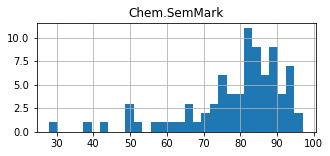

Distribution of Chemistry Marks for Class Prog_B
Mean of Chemistry Marks 78.67
Median of Chemistry Marks 82.0
Mode of Chemistry Marks 0    84
dtype: int64


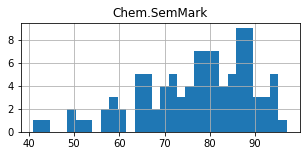

Distribution of Chemistry Marks for Class Prog_E
Mean of Chemistry Marks 76.92
Median of Chemistry Marks 80.0
Mode of Chemistry Marks 0    80
1    87
dtype: int64


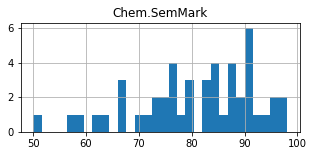

Distribution of Chemistry Marks for Class Prog_C
Mean of Chemistry Marks 80.5
Median of Chemistry Marks 82.0
Mode of Chemistry Marks 0    76
1    91
dtype: int64


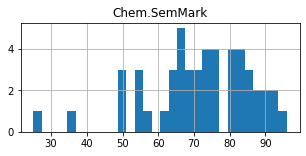

Distribution of Chemistry Marks for Class Prog_A
Mean of Chemistry Marks 71.62
Median of Chemistry Marks 73.5
Mode of Chemistry Marks 0    66
1    68
2    72
3    74
4    86
dtype: int64


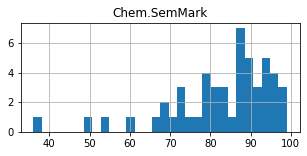

Distribution of Chemistry Marks for Class Prog_D
Mean of Chemistry Marks 82.82
Median of Chemistry Marks 87.0
Mode of Chemistry Marks 0    88
1    90
2    94
dtype: int64


In [11]:

import matplotlib.pyplot as plt

for i in proglist:
    chem2 = chem[chem['Program ID'] == i]    
    chem2.hist(bins=30, figsize=(5,2))
    plt.show()
    print('Distribution of Chemistry Marks for Class',i)
    mean = round(chem2['Chem.SemMark'].mean(),2)
    median = chem2['Chem.SemMark'].median()
    mode = chem2['Chem.SemMark'].mode()
    print('Mean of Chemistry Marks',mean)
    print('Median of Chemistry Marks',median)
    print('Mode of Chemistry Marks',mode)
    plt.show()

from the results above, program D has the highest median and mean for chemistry across all the programs while program A students do not seem to be doing as well with relatively lower mean and median compared to the other programs.

The median of the marks is more than the mean across all the programs. This indicates a negative skew, most values are concentrated on the right side of the distribution. In general students are performing better than average.

Program A might have more students that are struggling with chemistry if we look at the mode values they tend to be lower than the other programs.

In [12]:
classdata = data[["CLASS", "Chem.SemMark"]]
classdata

,CLASS,Chem.SemMark
0,A,86
1,A,93
2,A,63
3,A,84
4,A,87
...,...,...
330,N,94
331,N,87
332,N,73
333,N,90


In [13]:
classlist = data['CLASS'].unique().tolist()
classlist

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']

Distribution of Chemistry Marks for Class A
Mean of Chemistry Marks 84.28571428571429
Median of Chemistry Marks 86.0


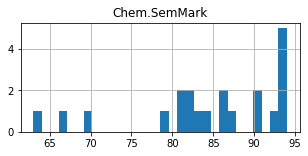

Distribution of Chemistry Marks for Class B
Mean of Chemistry Marks 78.0952380952381
Median of Chemistry Marks 82.0


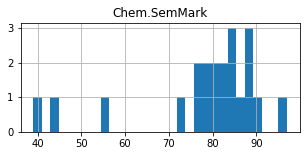

Distribution of Chemistry Marks for Class C
Mean of Chemistry Marks 78.66666666666667
Median of Chemistry Marks 79.0


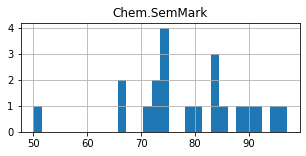

Distribution of Chemistry Marks for Class D
Mean of Chemistry Marks 73.10526315789474
Median of Chemistry Marks 81.0


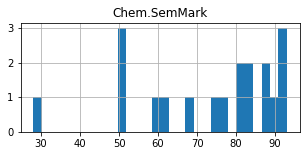

Distribution of Chemistry Marks for Class E
Mean of Chemistry Marks 77.78260869565217
Median of Chemistry Marks 82.0


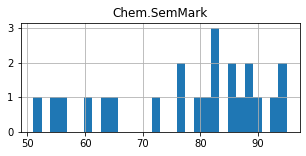

Distribution of Chemistry Marks for Class F
Mean of Chemistry Marks 71.72
Median of Chemistry Marks 75.0


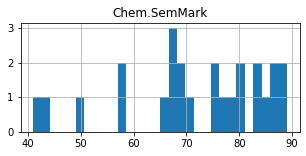

Distribution of Chemistry Marks for Class G
Mean of Chemistry Marks 79.0
Median of Chemistry Marks 82.0


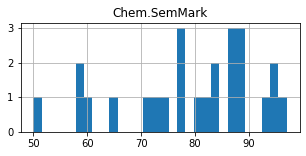

Distribution of Chemistry Marks for Class H
Mean of Chemistry Marks 79.0
Median of Chemistry Marks 80.0


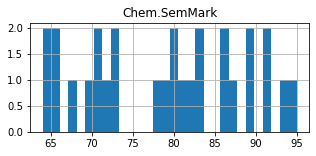

Distribution of Chemistry Marks for Class I
Mean of Chemistry Marks 79.625
Median of Chemistry Marks 79.5


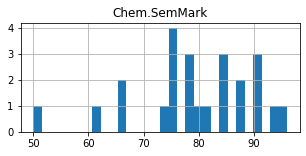

Distribution of Chemistry Marks for Class J
Mean of Chemistry Marks 81.375
Median of Chemistry Marks 85.0


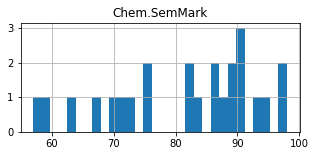

Distribution of Chemistry Marks for Class K
Mean of Chemistry Marks 76.96
Median of Chemistry Marks 77.0


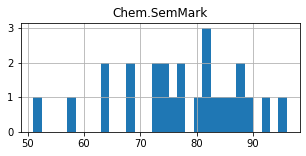

Distribution of Chemistry Marks for Class L
Mean of Chemistry Marks 66.28
Median of Chemistry Marks 67.0


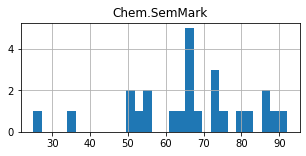

Distribution of Chemistry Marks for Class M
Mean of Chemistry Marks 82.2
Median of Chemistry Marks 88.0


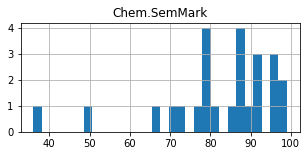

Distribution of Chemistry Marks for Class N
Mean of Chemistry Marks 83.42307692307692
Median of Chemistry Marks 87.0


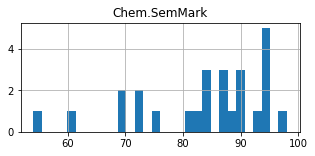

In [14]:
for i in classlist:
    classdata2 = classdata[classdata["CLASS"] == i]    
    classdata2.hist(bins=30, figsize=(5,2))
    print('Distribution of Chemistry Marks for Class',i)
    mean = classdata2['Chem.SemMark'].mean()
    median = classdata2['Chem.SemMark'].median()
    print('Mean of Chemistry Marks',mean)
    print('Median of Chemistry Marks',median)
    plt.show()

From the data above, it generally does not follow a normal distribution with some exceptions such as class B . this may be due to smaller sample sizes as there are more classes than programs. Hence using Programs instead of classes to evaluate effectiveness may be a better way.

### Question 3: Students from Prog_D consistently perform better. Is that a fair statement? Use hypothesis testing to prove or disprove this statement.
(15 Marks)

- Note: Use a one tail test. , one tail test ( which program program best or poorest)
have to filter for prog A vs B, to create sample dataset.
many hypothesis testing in place
choose one subject, compare with other programs ABCDE Q3 it is enough to pick one subject?


### Step 1: Construct the null and alternative hypothesis

We will be doing multiple hypothesis testing to show that Program D is better than all the other programs at a significance level of 0.05, which is the probability of rejecting the null hypothesis when it is true(type 1 error).

To show that students from Program D consistently perform better, we will show that the marks of students from program D is more than the averge mark of students from the other programs.



In [15]:
#first we find out the mean of all the programs for Chemistry Sem Mark.
# proglist is the list of program IDs from previous question
for i in proglist:
    marks = prog_b[prog_b["Program ID"] == i]
    meanmark = marks['Chem.SemMark'].mean()
    print('The Mean Chemistry Sem Mark for',i,'is', round(meanmark,2))

The Mean Chemistry Sem Mark for Prog_B is 78.67
The Mean Chemistry Sem Mark for Prog_E is 76.92
The Mean Chemistry Sem Mark for Prog_C is 80.5
The Mean Chemistry Sem Mark for Prog_A is 71.62
The Mean Chemistry Sem Mark for Prog_D is 82.82


<br>
$ H_0: \text{On average, the students of Program D perform better than Program A in Chemistry. (μ > 71.62)} $
<br>
$ H_1: \text{On average, the students of Program D do not perform better than Program A in Chemistry. (μ ≤71.62)} $

In [16]:
sig_level = 0.05

# Critical value. since critic
import scipy.stats
critical_value = scipy.stats.norm.ppf(.95,0,1)

# since the rejection region is on the left, the critical value is negative
critical_value = -critical_value
print(critical_value)

-1.6448536269514722


In [17]:
#make a dataset for Program D
program = data[data["Program ID"] == 'Prog_D']  # filters out program D from dataset
program_d = program['Chem.SemMark'] # filters out Chem Sem Marks for program D

In [18]:
from scipy import stats
from statsmodels.stats import weightstats as stests

null_hypothesis = 71.62 # average mark of program A

ztest ,pval = stests.ztest(program_d, alternative = 'smaller', x2=None, value=null_hypothesis, ddof = 0)
print(f"p-value is {float(pval)}")
print(f"z-statistic is {float(ztest)}")

p-value is 0.9999999997068267
z-statistic is 6.194057961923656


In [19]:
if ztest < critical_value:
    print("Reject null hypothesis, the students of Program D do not perform better than Program A in Chemistry.")
else:
    print("Accept null hypothesis,the students of Program D perform better than Program A in Chemistry.")

Accept null hypothesis,the students of Program D perform better than Program A in Chemistry.


We will continue with comparing Program D and Program B, plus the rest of the other programs.

<br>
$ H_0: \text{On average, the students of Program D perform better than Program B in Chemistry. (μ >78.67)} $
<br>
$ H_1: \text{On average, the students of Program D do not perform better than Program B in Chemistry.(μ ≤78.67)} $

In [20]:
null_hypothesis_B = 78.6 # average mark of Program B

ztest_b ,pval_b = stests.ztest(program_d, alternative = 'smaller', x2=None, value=null_hypothesis_B, ddof = 0)
print(f"p-value is {float(pval_b)}")
print(f"z-statistic is {float(ztest_b)}")

p-value is 0.9902295597232418
z-statistic is 2.335048627880498


In [21]:
if ztest_b < critical_value:
    print("Reject null hypothesis, the students of Program D do not perform better than Program B in Chemistry.")
else:
    print("Accept null hypothesis,the students of Program D perform better than Program B in Chemistry.")

Accept null hypothesis,the students of Program D perform better than Program B in Chemistry.


<br>
$ H_0: \text{On average, the students of Program D perform better than Program C in Chemistry. (μ >80.5)} $
<br>
$ H_1: \text{On average, the students of Program D do not perform better than Program C in Chemistry.(μ ≤80.5)} $

In [22]:

null_hypothesis_c = 80.5

ztest_c ,pval_c = stests.ztest(program_d, alternative = 'smaller', x2=None, value=null_hypothesis_c, ddof = 0)
print(f"p-value is {float(pval_c)}")
print(f"z-statistic is {float(ztest_c)}")

p-value is 0.9005342934674863
z-statistic is 1.2846019610206074


In [23]:
if ztest_c < critical_value:
    print("Reject null hypothesis, the students of Program D do not perform better than Program C in Chemistry.")
else:
    print("Accept null hypothesis,the students of Program D perform better than Program C in Chemistry.")

Accept null hypothesis,the students of Program D perform better than Program C in Chemistry.


<br>
$ H_0: \text{On average, the students of Program D perform better than Program E in Chemistry. (μ >76.92)} $
<br>
$ H_1: \text{On average, the students of Program D do not perform better than Program E in Chemistry.(μ ≤76.92)} $

In [24]:
null_hypothesis_e = 76.92

ztest_e ,pval_e = stests.ztest(program_d, alternative = 'smaller', x2=None, value=null_hypothesis_e, ddof = 0)
print(f"p-value is {float(pval_e)}")
print(f"z-statistic is {float(ztest_e)}")

p-value is 0.9994504816820282
z-statistic is 3.263864628051341


In [25]:
if ztest_e < critical_value:
    print("Reject null hypothesis, the students of Program D do not perform better than Program E in Chemistry.")
else:
    print("Accept null hypothesis,the students of Program D perform better than Program E in Chemistry.")

Accept null hypothesis,the students of Program D perform better than Program E in Chemistry.


<b>Question 4: Is the distribution of grades independent of the academic program?
(15 Marks)
Hint: Use a suitable chi-square test to examine if grade distribution is indeed independent of the academic program the student is in.</b>


### Step 1: Construct the null and alternative hypothesis

<br>
$ H_0: \text{Among all students, grades and academic program are independent.}$
<br>
$ H_1: \text{Among all students,grades and academic program are associated.} $

In [26]:
# if grade distribution independent of the academic program.
# this would be the test of independence Test of Independence (One sample, two response variables)

In [27]:
sig_level = 0.05

In [28]:
grades_acad = data[['Program ID','Chem.SemGrade']]
# do a pivot table to show distribution of grades across different programs
grades_acad.pivot_table(index="Program ID", columns="Chem.SemGrade",values ='Program ID',aggfunc=len, fill_value=0)

Chem.SemGrade,A,A+,AD,B,B+,C,C+,D,D+,F
Program ID,,,,,,,,,,
Prog_A,8,9,1,7,4,4,8,4,3,2
Prog_B,19,29,2,8,9,3,4,4,1,3
Prog_C,5,18,4,4,9,2,3,1,2,0
Prog_D,7,21,7,4,5,1,3,2,0,1
Prog_E,19,30,3,10,12,4,12,4,5,2


We need to group some of the columns together due to small sample size. Grouping the As,Bs s and Ds together would be appropriate.As the values for F is very little, it may be appropriate to group them with D.


In [29]:
# we need to group some of the columsn together due to small sample size. Grouping the As,Bs s and Ds together would be appropriate.

grades_acad.replace({'A+': 'A', 'AD': 'A','B+':'B','C+':'C','D+':'D','F':'D'},inplace=True)

C:\Users\Min\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
ga = grades_acad.pivot_table(index="Program ID", columns="Chem.SemGrade",values ='Program ID',aggfunc=len, fill_value=0)
ga

Chem.SemGrade,A,B,C,D
Program ID,,,,
Prog_A,18,11,12,9
Prog_B,50,17,7,8
Prog_C,27,13,5,3
Prog_D,35,9,4,3
Prog_E,52,22,16,11


In [31]:
ga_np = ga.to_numpy()
ga_np

array([[18, 11, 12,  9],
       [50, 17,  7,  8],
       [27, 13,  5,  3],
       [35,  9,  4,  3],
       [52, 22, 16, 11]], dtype=int64)

In [32]:
from scipy import stats
chi2, pval, dof, expected_obs = stats.chi2_contingency(ga_np)
print(f"chisq stat: {chi2} \np-value: {pval} \nDegrees of freedom: {dof} \nExpected_counts:\n {expected_obs}")

chisq stat: 19.213762361046843 
p-value: 0.08349867817072279 
Degrees of freedom: 12 
Expected_counts:
 [[27.40963855 10.84337349  6.62650602  5.12048193]
 [44.95180723 17.78313253 10.86746988  8.39759036]
 [26.31325301 10.40963855  6.36144578  4.91566265]
 [27.95783133 11.06024096  6.75903614  5.22289157]
 [55.36746988 21.90361446 13.38554217 10.34337349]]


In [33]:
if pval < sig_level:
    print("Reject null hypothesis in favor of the alternative that Chemistry Grades and Academic Program are associated.")
else: 
    print("Accept null hypothesis that Chemistry Grades and Academic Program are independent.")

Accept null hypothesis that Chemistry Grades and Academic Program are independent.


In [34]:
#note: do another version with at least 5 values in each cell.

# Question 5: What is the breakdown of each component to the final SemMark? For example, CA, Test 1, Test 2 and Test 3 contribute 40%, 20%, 20% and 20% respectively to the final semester mark for Chem (Chem.SemMark).
(15 Marks)



Hint: Pick one module and using linear regression, find the contribution of each component toward the final Semester mark. Explain using the statsmodel summary table to support your findings.

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X3 = data.loc[:,["Chem.CA", "Chem.TEST1","Chem.TEST2","Chem.TEST3"]].values
y3 = data.loc[:, "Chem.SemMark"].values 
print(X3)
print(y3)

[[ 85  68 100  90]
 [ 90  95 100  88]
 [ 79  53  29  75]
 ...
 [ 85  68  70  55]
 [ 88  95 100  78]
 [ 81 100  97  78]]
[86 93 63 84 87 90 93 81 82 83 92 93 67 86 79 70 90 94 82 81 94 77 84 80
 78 81 97 88 82 73 77 85 44 86 39 78 85 82 56 90 89 89 71 72 97 84 79 74
 84 94 84 74 91 80 88 75 85 50 74 67 90 73 66 60 68 87 62 92 91 84 76 81
 87 51 28 75 81 83 50 93 50 90 93 82 80 82 87 76 72 61 51 90 56 88 85 64
 82 95 94 81 54 85 89 65 77 69 57 88 76 44 66 86 78 77 87 58 80 50 89 67
 41 70 75 69 67 68 83 83 85 80 50 93 87 94 87 65 84 75 60 88 58 77 87 94
 77 97 77 80 73 71 88 58 89 84 82 70 80 66 93 71 80 64 95 86 65 82 83 89
 86 91 73 68 87 78 73 66 83 81 72 91 89 71 79 79 76 79 73 62 94 66 87 88
 66 76 85 78 85 91 76 50 96 85 75 82 80 91 91 89 89 93 87 90 88 91 82 98
 73 90 67 75 71 86 57 98 63 84 70 82 95 76 59 88 96 58 77 63 86 80 68 77
 74 84 82 64 73 92 68 74 83 82 72 75 89 81 51 87 64 61 72 86 92 50 89 80
 74 54 68 67 25 72 66 66 81 86 50 55 66 35 67 55 76 78 98 91 88 79 95 92
 96 

train it using the training set, features followed by dependent variable.


In [36]:
# train it using the training set, features followed by dependent variable.
lm.fit(X3, y3)

LinearRegression()

In [37]:
# beta 0 or intercept value
print(lm.intercept_) 

# beta_1 and beta_2
print(lm.coef_) # Check the coefficientts

0.16094570168614553
[0.39926902 0.19944308 0.19911926 0.20041963]


<br>
Therefore, the equation of our multivariate linear regression model is:

$$\textrm{Chem.SemMark} = 0.16  + 0.4 \times \textrm{Chem.CA} + 0.2 \times \textrm{Chem.TEST1} +  0.2 \times \textrm{Chem.TEST2} + 0.2 \times \textrm{Chem.TEST3} $$

rounded off to the nearest 2 decimal places.

</br>


## Question 6: If we know a student’s Chem, English, Geo marks, can we predict the Physics mark? Will knowing the Program ID increase the accuracy of the prediction?
(20 Marks)

In [38]:
#Firstly, we will do a boxplot of all the Sem marks for each subject to look for any outliers.



In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

subjects = data.loc[:,["Chem.SemMark","English.SemMark","Geo.SemMark"]].values
physics = data.loc[:, "Physics.SemMark"].values 
print(subjects)
print(physics)

[[ 86.  77.  81.]
 [ 93.  84.  67.]
 [ 63.  79.  65.]
 [ 84.  78.  72.]
 [ 87.  88.  93.]
 [ 90.  76.  62.]
 [ 93.  80.  97.]
 [ 81.  80.  69.]
 [ 82.  81.  73.]
 [ 83.  79.  76.]
 [ 92.  85.  81.]
 [ 93.  82.  79.]
 [ 67.  78.  79.]
 [ 86.  83.  82.]
 [ 79.  84.  76.]
 [ 70.  81.  56.]
 [ 90.  84.  94.]
 [ 94.  77.  85.]
 [ 82.  80.  75.]
 [ 81.  79.  76.]
 [ 94.  88.  97.]
 [ 77.  85.  95.]
 [ 84.  85.  72.]
 [ 80.  80.  88.]
 [ 78.  80.  77.]
 [ 81.  80.  92.]
 [ 97.  85.  88.]
 [ 88.  79.  91.]
 [ 82.  78.  80.]
 [ 73.  78.  79.]
 [ 77.  78.  91.]
 [ 85.  80.  91.]
 [ 44.  71.  58.]
 [ 86.  80.  84.]
 [ 39.  76.  69.]
 [ 78.  82.  81.]
 [ 85.  81.  77.]
 [ 82.  84.  81.]
 [ 56.  80.  81.]
 [ 90.  82.  86.]
 [ 89.  84.  93.]
 [ 89.  84.  82.]
 [ 71.  80.  68.]
 [ 72.  78.  66.]
 [ 97.  82.  87.]
 [ 84.  79.  78.]
 [ 79.  76.  75.]
 [ 74.  75.  88.]
 [ 84.  75.  85.]
 [ 94.  86.  83.]
 [ 84.  82.  91.]
 [ 74.  80.  81.]
 [ 91.  85.  98.]
 [ 80.  78.  76.]
 [ 88.  81.  92.]
 [ 75.  78

In [40]:
lm.fit(subjects,physics)

LinearRegression()

In [41]:
# beta 0 or intercept value
print(lm.intercept_) 

# beta_1 and beta_2
print(lm.coef_) # Check the coefficientts

43.957974087798604
[0.08139218 0.25461271 0.09450665]


<br>
Therefore, the equation of our multivariate linear regression model (based on chem,english and geo marks only) is:

$$\textrm{Phys.SemMark} = 43.96  + 0.08 \times \textrm{Chem.SemMark} + 0.25 \times \textrm{Eng.SemMark} +  0.09 \times \textrm{Geo.SemMark} $$

rounded off to the nearest 2 decimal places.


Next we will calculate r2 score to compare with the second linear regression model.
</br>


In [42]:
y2_pred = lm.predict(subjects)
from sklearn.metrics import r2_score
print(r2_score(physics,y2_pred))

0.33753542885950727


In [43]:
sem_marks = data[['Program ID','Chem.SemMark','Physics.SemMark','English.SemMark','Geo.SemMark']]

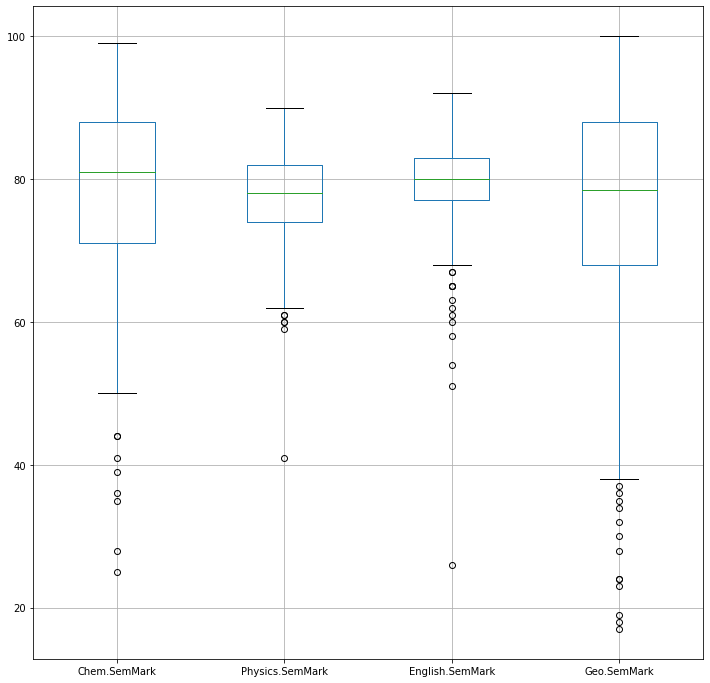

In [44]:
#boxplot of all the marks to show outliers.
sem_marks.boxplot(figsize=(12,12))
plt.show()

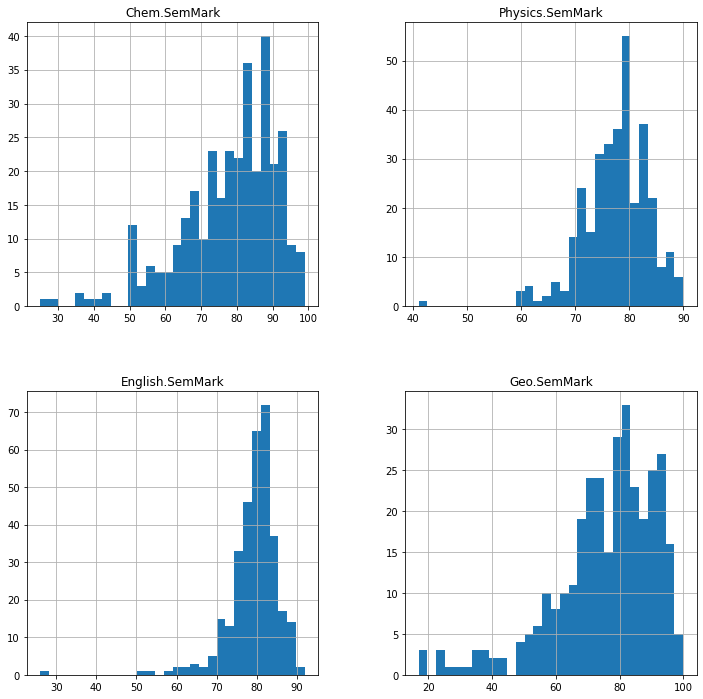

In [45]:
sem_marks.hist(bins=30,figsize=(12,12))
plt.show()

From the boxplot, There are a fair amount of outliers. we will trim the data and remove the outliers that could potentially affect the ML model. Below we will find the boundaries of the semmark of each variable.

In [46]:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

SM = ['Chem.SemMark','Physics.SemMark','English.SemMark','Geo.SemMark']

for i in SM:
    print('The upper and lower limits of', i, 'is', find_boundaries(sem_marks, i,1.5))



The upper and lower limits of Chem.SemMark is (113.5, 45.5)
The upper and lower limits of Physics.SemMark is (94.0, 62.0)
The upper and lower limits of English.SemMark is (92.0, 68.0)
The upper and lower limits of Geo.SemMark is (118.0, 38.0)


From the results above, it seems like
To preserve the distribution of the data and prevent skewing of the results, We will take a more conservative approach to trim outliers based on the upper and lower limits illustrated above. We will trim the values outside of the highers upper limit and the lowest lower limit from those illustratated above. 
From what we see, the lowest lower limit is from Geo.SemMark.The highest upper limit is 118, also from Geo.SemMark. As both extremes are from Geo.SemMark, we will use this variable to do trimming of outliers.As marks maximum is 100, any upper limit that is above 100 can be disregarded.

In [47]:
RM_upper_limit,RM_lower_limit = find_boundaries(sem_marks,'Geo.SemMark',1.5)

In [48]:
outliers = np.where(sem_marks['Geo.SemMark'] > RM_upper_limit , True,
                       np.where(sem_marks['Geo.SemMark'] < RM_lower_limit, True, False))

In [49]:
marks = sem_marks.loc[~outliers ]

In [50]:
marks.shape

(319, 5)

as we can see from above 319 rows compared to 332 entries before the outliers were trimmed. only 13 values were trimmed, which would remove outliers but not have a huge impact on the original distribution of the data.

Next we will do categorical encoding for Program ID and redo the linear model.

In [51]:
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    marks.drop('Physics.SemMark', axis=1), marks['Physics.SemMark'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((223, 4), (96, 4))

In [53]:
ohe_enc = OneHotEncoder(
    # to indicate how many top categories
    top_categories=None,  
    # we can select which variables to encode
    variables=['Program ID'],
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train)

OneHotEncoder(variables=['Program ID'])

In [54]:
X_train_ohe = ohe_enc.transform(X_train)

In [55]:
X_train_ohe

,Chem.SemMark,English.SemMark,Geo.SemMark,Program ID_Prog_D,Program ID_Prog_A,Program ID_Prog_C,Program ID_Prog_E,Program ID_Prog_B
305,71,78.0,67.0,1,0,0,0,0
275,81,84.0,85.0,0,1,0,0,0
217,98,89.0,94.0,0,0,1,0,0
93,90,77.0,82.0,0,0,0,1,0
261,72,73.0,93.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
264,50,77.0,56.0,0,1,0,0,0
200,76,83.0,70.0,0,0,1,0,0
121,67,82.0,75.0,0,0,0,1,0
49,74,75.0,88.0,0,0,0,0,1


In [56]:

lm2 = LinearRegression()

model = lm2.fit(X_train_ohe, y_train)
print('r2 for X_train_ohe :',lm2.score(X_train_ohe, y_train))

r2 for X_train_ohe : 0.30839170998087784


In [57]:
# decreases r2 using OHE. however can we try ordered ordinal encoding?

In [69]:
Xtrain_pred = lm2.predict(X_train_ohe)
from sklearn.metrics import r2_score
print('r2 score (predict X train)')
print(r2_score(y_train,Xtrain_pred))

r2 score (predict X train)
0.30839170998087784


In [59]:
print(lm2.intercept_) 

# beta_1 and beta_2
print(lm2.coef_) 

47.628280095196345
[ 0.14291335  0.18052384  0.05789408  0.78540692 -1.90871431  0.27216426
 -0.06478786  0.91593099]


In [60]:
# repeat for X test
X_test_ohe = ohe_enc.transform(X_test)
model_test = lm.fit(X_test_ohe, y_test)
print('r2 for X_test_ohe :',lm.score(X_test_ohe, y_test))

r2 for X_test_ohe : 0.26874988849771553


In [70]:
Xtest_pred = lm2.predict(X_test_ohe)
print('r2 score (predict X test)')
print(r2_score(y_test,Xtest_pred))

r2 score (predict X test)
0.1578315846208661


We can see that the score for X test does not improve.
We will try ordered ordinal encoding also on X train just for comparison:

In [62]:
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [63]:
X_train_enc = ordinal_enc.transform(X_train)
X_train_enc

,Program ID,Chem.SemMark,English.SemMark,Geo.SemMark
305,4,71,78.0,67.0
275,0,81,84.0,85.0
217,2,98,89.0,94.0
93,1,90,77.0,82.0
261,0,72,73.0,93.0
...,...,...,...,...
264,0,50,77.0,56.0
200,2,76,83.0,70.0
121,1,67,82.0,75.0
49,3,74,75.0,88.0


In [64]:
model2 = lm.fit(X_train_enc, y_train)
print('r2 for X_train_enc :',lm.score(X_train_enc, y_train))

r2 for X_train_enc : 0.3025066883651425


In [65]:
print(lm.intercept_) 

# beta_1 and beta_2
print(lm.coef_) 

47.56419811696814
[0.57382087 0.14770498 0.16254802 0.05902115]


relying on numerical variables alone gave better accuracy due to slightly higher r2 value. Perhaps program ID is not a good indicator to the eventual physics mark of the student.